# Brain MRI Tumor Segmentation - Otsu vs Sauvola

Task:
- **Global Otsu Thresholding**
- **Sauvola Adaptive Thresholding**

**Evaluation**: Dice Score, Jaccard Index

## Step 1: Install Required Libraries

In [1]:
pip install opencv-python scikit-image numpy matplotlib

  Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl (40.2 MB)
   ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
    --------------------------------------- 0.3/11.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.9 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.9 MB 3.0 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/11.9 MB 3.1 MB/s eta 0:00:04
   ------------- -------------------------- 3.9/11.9 MB 4.1 MB/s eta 0:00:02
   --------------- ------------------------ 4.7/11.9 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 6.0/11.9 MB 4.5 MB/s eta 0:00:02
   ---------------------------- ----------- 8.4/11.9 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 11.0/11.9 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 11.9/11.9 MB 6.1 MB/s eta 0:00:00
   -----------


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 2: Import Libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_sauvola
import os

## Step 3: Upload Dataset

**Option A: Upload ZIP file directly**

In [3]:
image_dir = "C:\\Users\\tripa\\OneDrive\\Desktop\\IIITR B.TECH\\SEM-06\\MIP\\Assignment_01\\archive\\images"
mask_dir = "C:\\Users\\tripa\\OneDrive\\Desktop\\IIITR B.TECH\\SEM-06\\MIP\\Assignment_01\\archive\\masks"

image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

## Step 4: Matrics (Dice + Jaccard)


In [4]:
def dice_score(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt) + 1e-7)

def jaccard_index(pred, gt):
    intersection = np.sum(pred * gt)
    union = np.sum(pred) + np.sum(gt) - intersection
    return intersection / (union + 1e-7)

## Step 5: Define Thresholding Methods

### Otsu Global Thresholding

In [5]:
def otsu_segmentation(img):
    _, thresh = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh // 255

### Sauvola Adaptive Thresholding 

In [6]:
def sauvola_segmentation(img):
    window_size = 25
    thresh_sauvola = threshold_sauvola(img, window_size=window_size)
    binary = img > thresh_sauvola
    return binary.astype(np.uint8)

## Step 6: Define Evaluation Metrics

In [7]:
dice_otsu, jac_otsu = [], []
dice_sau, jac_sau = [], []

for img_file, mask_file in zip(image_files, mask_files):
    img = cv2.imread(os.path.join(image_dir, img_file), 0)
    gt = cv2.imread(os.path.join(mask_dir, mask_file), 0)

    gt = (gt > 0).astype(np.uint8)

    pred_otsu = otsu_segmentation(img)
    pred_sau = sauvola_segmentation(img)

    dice_otsu.append(dice_score(pred_otsu, gt))
    jac_otsu.append(jaccard_index(pred_otsu, gt))

    dice_sau.append(dice_score(pred_sau, gt))
    jac_sau.append(jaccard_index(pred_sau, gt))

## Step 7: Final Results 

In [8]:
print("Otsu Dice:", np.mean(dice_otsu))
print("Otsu Jaccard:", np.mean(jac_otsu))

print("Sauvola Dice:", np.mean(dice_sau))
print("Sauvola Jaccard:", np.mean(jac_sau))

Otsu Dice: 0.07074164298397466
Otsu Jaccard: 0.037645978968491006
Sauvola Dice: 0.0462817208561426
Sauvola Jaccard: 0.024083547293944563


## Step 8: Visual comparison

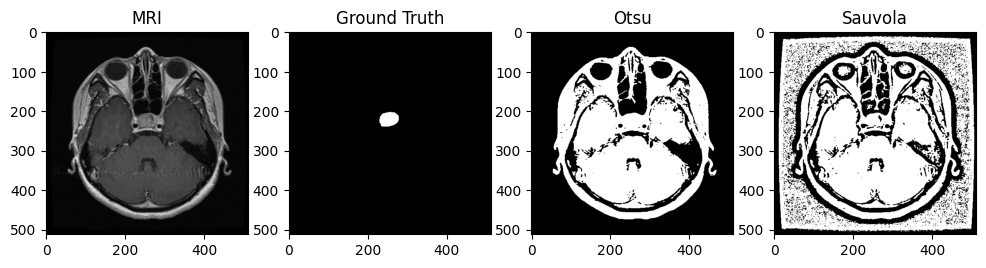

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("MRI")

plt.subplot(1,4,2)
plt.imshow(gt, cmap='gray')
plt.title("Ground Truth")

plt.subplot(1,4,3)
plt.imshow(pred_otsu, cmap='gray')
plt.title("Otsu")

plt.subplot(1,4,4)
plt.imshow(pred_sau, cmap='gray')
plt.title("Sauvola")

plt.show()